In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
meets = pd.read_csv("meets.csv")

In [5]:
meets.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [6]:
power_lift = pd.read_csv("openpowerlifting.csv")

In [7]:
power_lift.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [8]:
power_lift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
MeetID            386414 non-null int64
Name              386414 non-null object
Sex               386414 non-null object
Equipment         386414 non-null object
Age               147147 non-null float64
Division          370571 non-null object
BodyweightKg      384012 non-null float64
WeightClassKg     382602 non-null object
Squat4Kg          1243 non-null float64
BestSquatKg       298071 non-null float64
Bench4Kg          1962 non-null float64
BestBenchKg       356364 non-null float64
Deadlift4Kg       2800 non-null float64
BestDeadliftKg    317847 non-null float64
TotalKg           363237 non-null float64
Place             385322 non-null object
Wilks             362194 non-null float64
dtypes: float64(10), int64(1), object(6)
memory usage: 50.1+ MB


In [9]:
power_lift["Place"].unique()

array(['1', '2', 'DQ', '3', 'G', '4', '5', '6', '7', '8', '9', '10', '11',
       'NS', nan, '15', '13', '14', '12', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', 'DD', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74',
       '75', '76', '77'], dtype=object)

In [10]:
power_lift['Division'].unique()[2020]

'retrosm1'

In [11]:
women = power_lift[power_lift['Sex'] == 'F']

In [12]:
women.drop(labels = "Sex Squat4Kg Bench4Kg Deadlift4Kg".split(), axis = 1, inplace = True)

/home/frk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
women.drop_duplicates(inplace = True)

/home/frk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
women.drop(labels = ['WeightClassKg'], axis = 1, inplace = True)

/home/frk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [15]:
women_corr = women.drop(labels = ['MeetID', 'Name', 'Equipment'], axis = 1).corr()

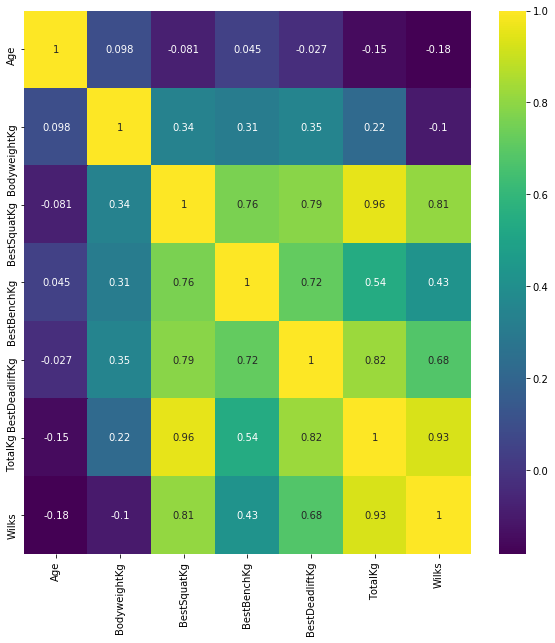

In [16]:
plt.figure(figsize = (10,10))
sns.heatmap(women_corr, annot = True, cmap = "viridis")

In [17]:
power_lift.columns

Index(['MeetID', 'Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat4Kg', 'BestSquatKg', 'Bench4Kg', 'BestBenchKg',
       'Deadlift4Kg', 'BestDeadliftKg', 'TotalKg', 'Place', 'Wilks'],
      dtype='object')

In [18]:
def correlationBetweenResults(dataframe):
    df = dataframe.drop(labels = "MeetID Name Sex Equipment Division Squat4Kg Bench4Kg Deadlift4Kg Place Wilks".split(), axis = 1)
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.corr(), annot = True, cmap = "viridis")

In [19]:
def placeToNumeric(x):
    try:
        place = int(float(x))
    except:
        place = 1000
    return place

In [20]:
power_lift['Place'] = power_lift['Place'].apply(placeToNumeric)

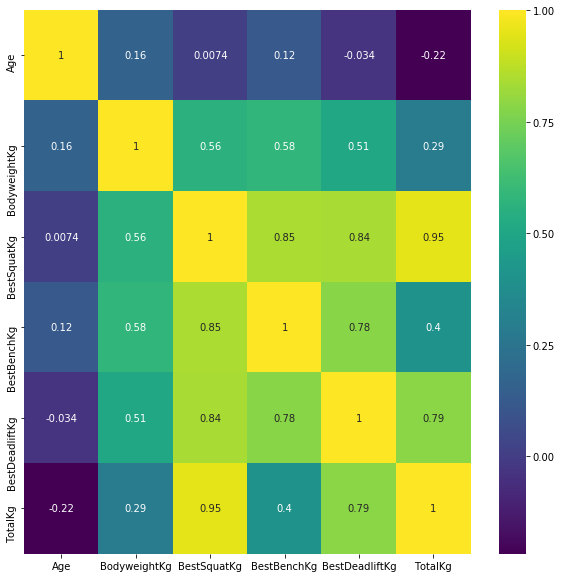

In [21]:
#we want to see top men performers correlation between scores in different parts of the competition
correlationBetweenResults(power_lift[(power_lift['Sex'] == 'M') & (power_lift['Place'] <= 10)])

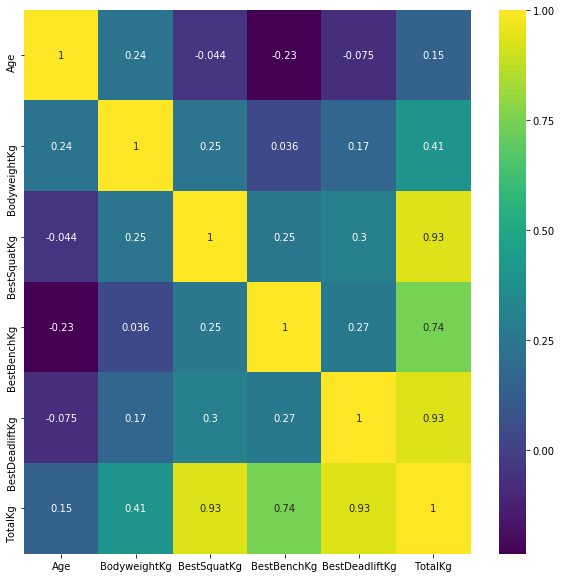

In [22]:
#if we change to worse competitors then correlation becomes less significant as (probably) results are less consistent
#and depend more on luck, on the other hand participants may specialise in certain part and do not have time to improve their
#poor performance in other parts while top participants are improving their results in all parts as much as they can as the're close to the limit
#
correlationBetweenResults(power_lift[(power_lift['Sex'] == 'M') & (power_lift['Place'] > 10)])

In [23]:
#correlation between squat and total and deadlift and total stays strong as the're parts of the sum in total and they're 
#bigger numbers than bench score

In [24]:
power_lift.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


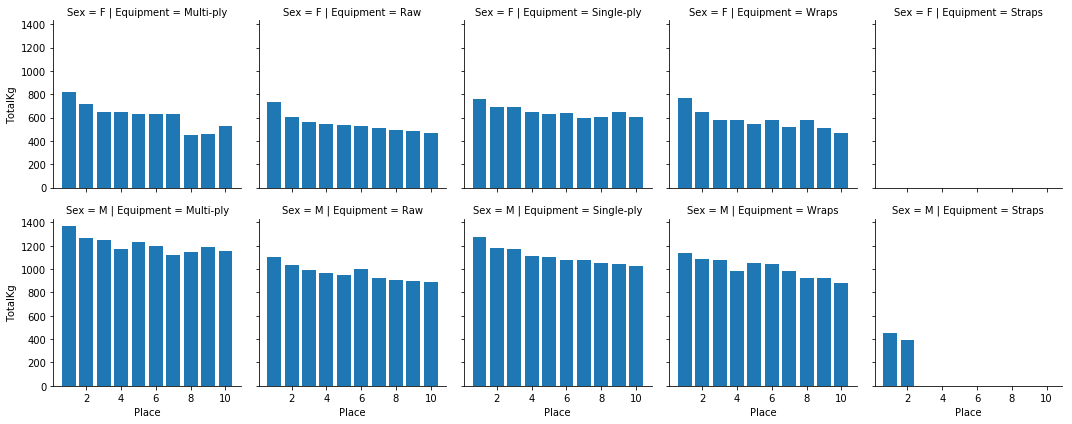

In [34]:
df = power_lift[power_lift['Place'] < 11].groupby(by = ['Sex', 'Equipment', 'Place'], as_index = False).max()
sns.FacetGrid(df, row = 'Sex', col = 'Equipment').map(plt.bar, 'Place', 'TotalKg')

In [ ]:
plt.bar()